# Code for generating all figures of the manuscript "ordpy: A Python package for data analysis with permutation entropy and ordinal networks methods"

## Load modules

In [59]:
import numpy as np

#if you have not installed the package, you can run the line below instead of importing ordpy.
%run ../ordpy/ordpy.py
# from ordpy import *

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

import string
import glob
import warnings

#extend notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:99.5% !important;} </style>"))

<Figure size 655.2x504 with 0 Axes>

In [60]:
%config Completer.use_jedi = False
%matplotlib inline

In [20]:
#The igraph module is needed to draw directed ordinal networks. The networkx is used to drawing the undirected form of those networks.
import igraph
import networkx as nx

## Definitions

In [61]:
def stdfigsize(scale=1, nrows=1, ncols=1, ratio=1.3):
    """
    Returns a tuple to be used as figure size.

    Parameters
    ----------
    returns (7*ratio*scale*nrows, 7.*scale*ncols)
    By default: ratio=1.3
    ----------
    Returns (7*ratio*scale*nrows, 7.*scale*ncols).
    """

    return((7*ratio*scale*ncols, 7.*scale*nrows))

In [62]:
sns.set_style("white")
sns.set_style({"xtick.direction": "out", "ytick.direction": "out"})

rcparams = {
    'font.family': 'sans-serif',
    'font.sans-serif': ['Helvetica'],
    'axes.labelsize': 28,
    'axes.titlesize': 28,
    'legend.fontsize': 20,
    'ytick.right': 'off',
    'xtick.top': 'off',
    'ytick.left': 'on',
    'xtick.bottom': 'on',
    'xtick.labelsize': '25',
    'ytick.labelsize': '25',
    'axes.linewidth': 2.5,
    'xtick.major.width': 1.8,
    'xtick.minor.width': 1.8,
    'xtick.major.size': 14,
    'xtick.minor.size': 7,
    'xtick.major.pad': 10,
    'xtick.minor.pad': 10,
    'ytick.major.width': 1.8,
    'ytick.minor.width': 1.8,
    'ytick.major.size': 14,
    'ytick.minor.size': 7,
    'ytick.major.pad': 10,
    'ytick.minor.pad': 10,
    'axes.labelpad': 15,
    'axes.titlepad': 15,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'figure.figsize': stdfigsize(),
    'lines.linewidth': 3
}
mpl.rcParams.update(rcparams)

In [63]:
def normalize_array(x):
    """
    Normalizes an array between 0 and 1
    
    Parameters
    ----------
    x: a numpy array
    ----------
    Returns a normalized array.
    
    """
    x = x-x.min()
    return x/x.max()

## Using `ordinal_distribution` (Figure 1)

### definitions

In [64]:
def random_walk(n=100000):
    return np.cumsum(np.random.normal(size=n))

In [65]:
def logistic(a=4, n=100000, x0=0.4):
    """
    Iterates the logistic map.
    
    Parameters
    ----------
    x0: initial population ([0,1] interval)
    a : intrinsic growth rate (a >= 0; interesting in [0,4] because then, it 
        maps the orbit to the [0,1] interval to itself.)
    n : number of map iterations (length of the series).
    ----------
    Returns a logistic map orbit.
    """
    x    = np.zeros(n)
    x[0] = x0
    
    for i in range(n-1):
        x[i+1] = a*x[i]*(1-x[i])
        
    return x

In [66]:
#exact ordinal distribution for random walks
Pwalk = [0.25, 0.125, 0.125, 0.125, 0.125, 0.25]

#exact ordinal distribution for the fully chaotic logist map
Plogistic = [1/3, 1/15, 2/15, 3/15, 4/15,0]

In [27]:
#similated time series from random walk
rw = random_walk(n=100000)

#similated time series from the logistic map
logmap = logistic(a=4, n=100000, x0=np.random.uniform())

#empirical distributions
_, rw_probs = ordinal_distribution(rw, return_missing=True)
_, logistic_probs = ordinal_distribution(logmap, return_missing=True)

### plotting

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


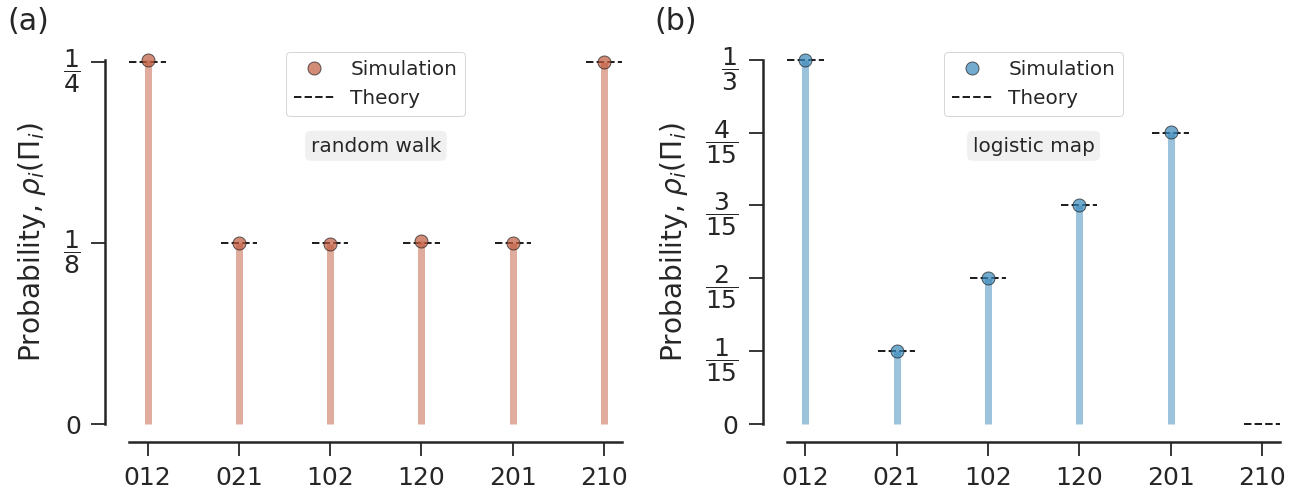

In [28]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=stdfigsize(nrows=1, ncols=2))

colors = ['#C05A3C', '#3888BA'] #palettable.cmocean.diverging.Balance_5_r.hex_colors[1::2]

ax[0].hlines(Pwalk,
             xmin=[i - .2 for i in range(6)],
             xmax=[i + .2 for i in range(6)],
             linestyle='--',
             linewidth=2,
             color='#202020',
             label='Theory')

ax[0].vlines([i for i in range(6)],
             ymin=0,
             ymax=rw_probs,
             color=colors[0],
             linewidth=7,
             alpha=.5)

ax[0].plot([i for i in range(6)],
           rw_probs,
           'o',
           markersize=13,
           color=colors[0],
           markeredgecolor='#202020',
           label='Simulation',
           alpha=.7)

ax[1].hlines(Plogistic,
             xmin=[i - .2 for i in range(6)],
             xmax=[i + .2 for i in range(6)],
             linestyle='--',
             linewidth=2,
             color='#202020',
             label='Theory')

ax[1].vlines([i for i in range(6)],
             ymin=0,
             ymax=logistic_probs,
             color=colors[1],
             linewidth=7,
             alpha=.5)

ax[1].plot([i for i in range(5)],
           logistic_probs[:-1],
           'o',
           markersize=13,
           color=colors[1],
           markeredgecolor='#202020',
           label='Simulation',
           alpha=.7)

#plotting style
for i, ax_ in enumerate(ax):
    ax_.set_xticks([i for i in range(6)])

    if i == 0:
        ax_.set_xticklabels(['012', '021', '102', '120', '201', '210'])
        ax_.set_yticks([0, 1 / 8, 1 / 4])
        ax_.annotate('(a)', (-0.18, 1.03),
                     xycoords='axes fraction',
                     fontsize=30)
        ax_.set_yticklabels([
            '0', '$\dfrac{1}{8}$', '$\dfrac{1}{4}$'
        ])
        ax_.annotate('random walk', (.5, .74),
                 va='center',
                 ha='center',
                 xycoords='axes fraction',
                 fontsize=20,
                 bbox={
                     'boxstyle': 'round',
                     'fc': '#f0f0f0',
                     'alpha': 1
                 })
    else:
        ax_.set_xticklabels(['012', '021', '102', '120', '201', '210'])
        ax_.set_yticks([1 / 3, 1 / 15, 2 / 15, 3 / 15, 4 / 15, 0])
        ax_.annotate('(b)', (-0.2, 1.03),
                     xycoords='axes fraction',
                     fontsize=30)

        ax_.set_yticklabels([
            '$\dfrac{1}{3}$', '$\dfrac{1}{15}$', '$\dfrac{2}{15}$',
            '$\dfrac{3}{15}$', '$\dfrac{4}{15}$', '0'
        ])
        
        ax_.annotate('logistic map', (.5, .74),
                 va='center',
                 ha='center',
                 xycoords='axes fraction',
                 fontsize=20,
                 bbox={
                     'boxstyle': 'round',
                     'fc': '#f0f0f0',
                     'alpha': 1
                 })

    ax_.set_ylabel(r'Probability, $\rho_i(\Pi_i)$')
    ax_.spines['left'].set_smart_bounds(True)
    ax_.spines['bottom'].set_smart_bounds(True)
    ax_.legend(loc='upper center')

f.tight_layout()
f.savefig('manuscript_figures/fig1.pdf', dpi=300, bbox_inches='tight')

## Using `permutation_entropy` (Figures 2)

### definitions

In [67]:
def transient_logistic_map(x0=.65, r0 = 2.8):
    """
    Iterates the logistic map changing the
    growth parameter r at each step. Initial 
    conditions x0=.65, r(0)=2.8 and incremental 
    steps of 10e-5.
    
    Parameters
    ----------
    ----------
    Returns the corresponding transient 
    logistic map time series.
    
    References:
    -----------
    - Cao et al., Detecting dynamical changes in time series using the permutation entropy, 
    Phys. Rev. E 70, 046217 (2004);
    
    - L.L. Trulla et al., Recurrence quantification analysis of the logistic equation
    with transients, Phys. Letters A 223 (1996) 255-260.
    """
    x = [r0*x0*(1-x0)]
    i = 0

    for r_ in np.arange(2.80001,4.00001,.00001):
        x += [r_*x[i]*(1-x[i])]
        i += 1
            
    return x

### generating data

In [30]:
# ~55 min to run. Already saved in the 'data' folder.

# entropy_logistic = []
# r = np.linspace(3.5, 4., num=5001)
# for r_ in r:
#     data = logistic(r_)
#     entropy_logistic += [permutation_entropy(data, dx=6, base=2, normalized=False)/5]
# np.save("data/fig2/entropy_logistic.npy", entropy_logistic)

entropy_logistic = np.load("data/fig2/entropy_logistic.npy")

In [31]:
# ~30 seconds to run. Already saved in the 'data' folder.

# logistic_bp = []
# for r in np.linspace(3.5, 4., num=501):
#     logistic_bp.append(logistic(a=r, x0=np.random.uniform())[90000:])
# np.save('data/fig2/logistic_bp.npy', logistic_bp)

logistic_bp = np.load('data/fig2/logistic_bp.npy')

In [32]:
# ~24 minutes to run. Already saved in the 'data' folder.

# ts_tlogmap = transient_logistic_map()

# h_tlogmap_tau1 = []
# h_tlogmap_tau2 = []

# for i in range(0,120001-1023):
#     ts_window  = ts_tlogmap[i:i+1024]
#     h_tlogmap_tau1.append(permutation_entropy(ts_window, dx=5))
#     h_tlogmap_tau2.append(permutation_entropy(ts_window, dx=5, taux=2))    

# np.save('data/fig2/h_tlogmap_tau1.npy', np.concatenate((np.zeros(1023), h_tlogmap_tau1)))
# np.save('data/fig2/h_tlogmap_tau2.npy', np.concatenate((np.zeros(1023), h_tlogmap_tau2)))

h_tlogmap_tau1 = np.load('data/fig2/h_tlogmap_tau1.npy')
h_tlogmap_tau2 = np.load('data/fig2/h_tlogmap_tau2.npy')

In [33]:
# ~30 seconds to run. Already saved in the 'data' folder.

# h2d_ising = []
# c2d_ising = []

# for dx_, dy_ in [[3,2], [2,3]]:
#     temp, temp2 = [], []
#     for path in sorted(glob.glob('data/fig2/ising-surfaces-pickles/100000ising*')):
#         surface_ = np.load(path)
#         h_, c_   = complexity_entropy(surface_, dx=dx_, dy=dy_)
#         temp.append(h_)
#         temp2.append(c_)
#     h2d_ising.append(temp)
#     c2d_ising.append(temp2)

# np.save('data/fig2/h2d_ising.npy',h2d_ising)
# np.save('data/fig2/c2d_ising.npy',c2d_ising)

ising2d8  = normalize_array(np.load('data/fig2/ising-surfaces-pickles/100000ising0.8.npy'))
ising2d9  = normalize_array(np.load('data/fig2/ising-surfaces-pickles/100000ising0.9.npy'))
ising2d10 = normalize_array(np.load('data/fig2/ising-surfaces-pickles/100000ising1.0.npy'))
ising2d11 = normalize_array(np.load('data/fig2/ising-surfaces-pickles/100000ising1.1.npy'))

h2d_ising = np.load('data/fig2/h2d_ising.npy')
c2d_ising = np.load('data/fig2/c2d_ising.npy')

### plotting

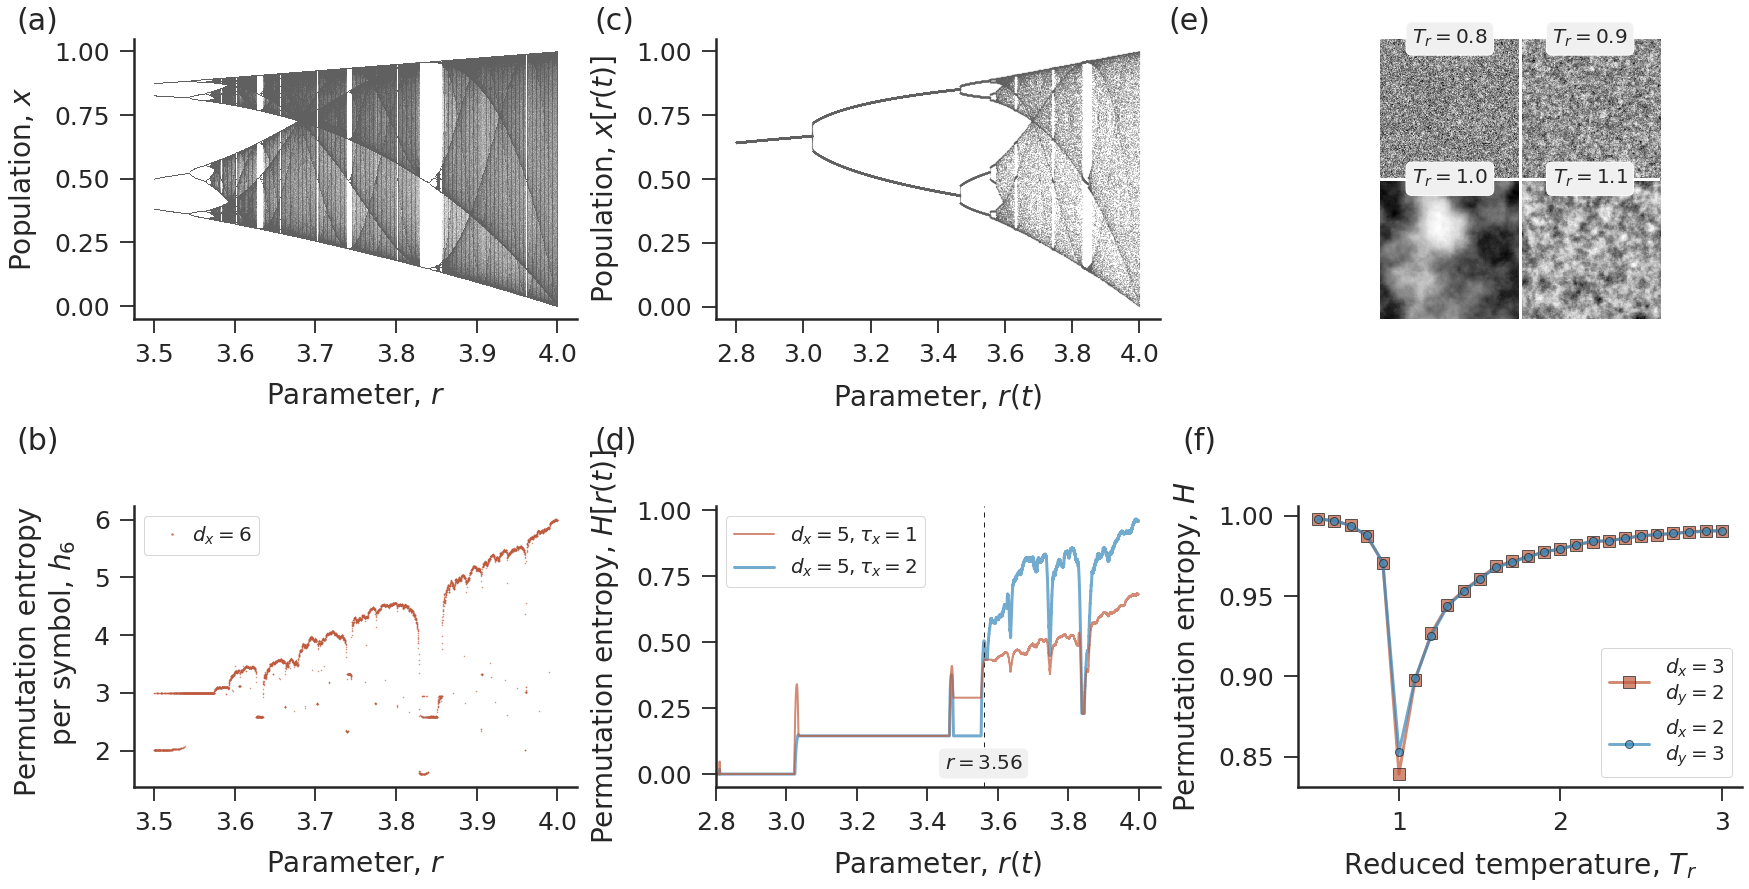

In [34]:
f, ax = plt.subplots(ncols=3,
                     nrows=2,
                     figsize=stdfigsize(ncols=3, nrows=2, scale=0.89))

ax = ax.flatten()

colors = ['#C05A3C', '#3888BA'
          ]  #palettable.cmocean.diverging.Balance_5_r.hex_colors[1::2]

#bifurcation logistic map (a)
bifurcation = []
for i, r in enumerate(np.linspace(3.5, 4., num=501)):
    bifurcation += [zip(np.full(10000, r), logistic_bp[i])]

bifurcation = list(map(list, bifurcation))
bifurcation = np.concatenate(bifurcation).T
ax[0].plot(*bifurcation,
           '.',
           markersize=.11,
           color='#606060',
           alpha=.2,
           rasterized=True)

ax[0].set_ylabel('Population, $x$')
ax[0].set_xlabel('Parameter, $r$')
ax[0].set_xticks(np.arange(3.5, 4.05, .1).round(decimals=1))
ax[0].annotate('(a)', (-0.265, 1.03), xycoords='axes fraction', fontsize=30)

#entropy logistic map (b)
ax[3].plot(np.linspace(3.5, 4., num=5001),
           entropy_logistic,
           'o',
           markersize=0.5,
           color=colors[0],
           label=r'$d_x = 6$',
           rasterized=True,
           alpha=0.7)

ax[3].set_xlabel('Parameter, $r$')
ax[3].set_ylabel('Permutation entropy \n per symbol, $h_6$',
                 multialignment='center')
ax[3].legend(handletextpad=0, markerscale=3)
ax[3].set_xticks(np.arange(3.5, 4.05, .1).round(decimals=1))
ax[3].annotate('(b)', (-0.265, 1.2), xycoords='axes fraction', fontsize=30)

#transient logistic map (c)
ax[1].plot(np.arange(2.8, 4, .00001),
           transient_logistic_map(),
           '.',
           markersize=.2,
           color='#606060',
           rasterized=True)

ax[1].set_ylabel('Population, $x[r(t)]$')
ax[1].set_xlabel('Parameter, $r(t)$')
ax[1].set_xticks(np.arange(2.8, 4.05, .2).round(decimals=1))
ax[1].annotate('(c)', (-0.275, 1.03), xycoords='axes fraction', fontsize=30)
ax[1].annotate('(e)', (1.02, 1.03), xycoords='axes fraction', fontsize=30)

#entropy transient logistic map (d)
x_tlogmap = np.arange(2.8000, 4.00001, .00001)
for y_, l_, c_ in zip([h_tlogmap_tau1, h_tlogmap_tau2],
                      [r'$d_x = 5, \tau_x = 1$', r'$d_x = 5, \tau_x = 2$'],
                      colors):
    if l_ == r'$d_x = 5, \tau_x = 2$':
        ax[4].plot(x_tlogmap,
                   y_,
                   linewidth=3,
                   label=l_,
                   color=c_,
                   rasterized=True,
                   zorder=0,
                   alpha=0.7)
    else:
        ax[4].plot(x_tlogmap,
                   y_,
                   linewidth=2,
                   label=l_,
                   color=c_,
                   rasterized=True,
                   alpha=0.7)

ax[4].axvline(3.56, linewidth=1, color='#202020', dashes=(5, 5), zorder=0)
ax[4].annotate(rf'$r = 3.56$', (3.56, 0.04),
               va='center',
               ha='center',
               xycoords='data',
               fontsize=20,
               bbox={
                   'boxstyle': 'round',
                   'fc': '#f0f0f0',
                   'alpha': 1
               })

ax[4].set_xlabel('Parameter, $r(t)$')
ax[4].set_ylabel('Permutation entropy, $H[r(t)]$')
ax[4].set_xlim(left=2.8)
ax[4].legend(loc='upper left')
ax[4].set_xticks(np.arange(2.8, 4.05, .2).round(decimals=1))
ax[4].annotate('(d)', (-0.275, 1.2), xycoords='axes fraction', fontsize=30)

#ising surfaces (e)
s_ = np.concatenate(
    (np.concatenate((ising2d8, ising2d9),
                    axis=1), np.concatenate((ising2d10, ising2d11), axis=1)))
ax[2].imshow(s_, cmap='Greys', interpolation='nearest', rasterized=True)

ax[2].axvline(250, color='white')
ax[2].axhline(250, color='white')

for T, pos in zip([0.8, 0.9, 1.0, 1.1],
                  [[0.25, 1], [0.75, 1], [0.25, 0.5], [0.75, 0.5]]):
    ax[2].annotate(rf'$T_r = {T}$', (pos[0], pos[1]),
                   va='center',
                   ha='center',
                   xycoords='axes fraction',
                   fontsize=20,
                   bbox={
                       'boxstyle': 'round',
                       'fc': '#f0f0f0',
                       'alpha': 1
                   })
ax[2].axis('off')

#entropy ising surfaces (f)
x_ising = np.arange(0.5, 3.05, 0.1).round(decimals=2)
for y_, c_, m_, ms_, l_ in zip(h2d_ising, colors, ['s', 'o'], [12, 8],
                               ['$d_x = 3$\n$d_y=2$', '$d_x = 2$\n$d_y=3$']):
    ax[5].plot(x_ising,
               y_,
               '-o',
               marker=m_,
               markersize=ms_,
               color=c_,
               label=l_,
               alpha=0.7,
               markeredgecolor='#202020')

ax[5].set_xlabel(r'Reduced temperature, $T_r$')
ax[5].set_ylabel('Permutation entropy, $H$')
ax[5].legend()
ax[5].annotate('(f)', (-0.26, 1.2), xycoords='axes fraction', fontsize=30)

f.tight_layout()
f.savefig('manuscript_figures/fig2.pdf', dpi=300, bbox_inches='tight')

## Using `complexity_entropy` (Figure 3)

### definitions

In [68]:
#Skew tent map
def skew_tent_map(n=2**15, omega=0.1847, x0=.5):
    """
    Iterates the Skew tent map.
    
    Parameters
    ----------
    n     : time series length.
    omega : map parameter.
    x0    : initial condition.
    ----------
    Returns an array corresponding to a 
    time series.
    """
    x    = np.zeros(n)
    x[0] = x0
    
    for i in range(1, len(x)):
        if x[i-1] < omega:
            x[i] = x[i-1]/omega
        else:
            x[i] = (1-x[i-1])/(1-omega)
    
    return x

In [69]:
#Logistic map
def logistic_map(n=2**15, r=4, x0=0.4):
    """
    Iterates the logistic map.
    
    Parameters
    ----------
    n  : number of map iterations (length of the series).
    x0 : initial population ([0,1] interval)
    r  : intrinsic growth rate (r >= 0; interesting in [0,4] because then, it 
         maps the orbit to the [0,1] interval to itself.)
    ----------
    Returns a logistic map orbit.
    """
    x    = np.zeros(n)
    x[0] = x0
    
    for i in range(n-1):
        x[i+1] = r*x[i]*(1-x[i])
        
    return x

In [70]:
#Henon's map
def henon_map(n=2**15, a=1.4, b=0.3, x0=.5, y0=.5):
    """
    Paramenters
    -----------
    n  : time series length.
    a  : map parameter.
    b  : map parameter.
    x0 : initial condition.
    y0 : initial condition.
    -----------
    
    Returns the x and y variables of Henón's map.
    """
    with warnings.catch_warnings():
        warnings.simplefilter("error")
            
        bool_ = False
        while bool_==False:        
            try:
                x    = np.zeros(n)
                y    = np.zeros(n)

                x[0] = x0
                y[0] = y0

                for i in range(1, n):
                    x[i] = 1 - a*x[i-1]**2 + y[i-1]
                    y[i] = b*x[i-1]

                bool_ = True

            except RuntimeWarning: #changes the random inital condition
                x0 = np.random.uniform()
                y0 = np.random.uniform()

    return x, y

In [71]:
#Schuster's map
def schuster_map(n=2**15, z=2, x0=.5):
    """
    
    Parameters
    ----------
    n : time series length
    z :  map parameter
    ----------
    Returns an orbit of an iterated Schuster map.
    """
    z    = float(z)
    x    = np.zeros(n)
    x[0] = x0
    
    for i in range(1, n):
        x[i], _ = np.modf(x[i-1] + x[i-1]**z)
    
    return x

### generaring data

In [39]:
# ~30 seconds to run.

# TIME SERIES DATA
# Chaotic Maps (empty markers)

hc_stentmap = np.mean([
    complexity_entropy(skew_tent_map(x0=np.random.uniform()), dx=6)
    for _ in range(10)
],
                      axis=0)

hc_henon_x, hc_henon_y = np.mean(
    [[complexity_entropy(x_, dx=6),
      complexity_entropy(y_, dx=6)]
     for x_, y_ in [(henon_map(x0=np.random.uniform(), y0=np.random.uniform()))
                    for _ in range(10)]],
    axis=0)

hc_logistic = np.mean([
    complexity_entropy(logistic_map(x0=np.random.uniform()), dx=6)
    for _ in range(10)
],
                      axis=0)

hc_schuster = np.mean([[
    complexity_entropy(schuster_map(z=z_, x0=np.random.uniform()), dx=6)
    for _ in range(10)
] for z_ in [3 / 2, 2, 5 / 2]],
                      axis=1)

# Stochastic processes (filled markers)
# either run or load, to get the k-noise data. 
# To run, you have to install the colorednoise module - 
# https://github.com/felixpatzelt/colorednoise

# import colorednoise
# hc_knoise = np.mean([[
#     complexity_entropy(
#         colorednoise.powerlaw_psd_gaussian(exponent=k_, size=2**15), dx=6)
#     for _ in range(10)
# ] for k_ in np.arange(0, 3.1, .25).round(decimals=2)],
#                     axis=1)
# np.save('data/fig3/hc_knoise.npy', hc_knoise)

hc_knoise = np.load('data/fig3/hc_knoise.npy')
hc_fbm = np.load('data/fig3/hc_fbm.npy')
hc_fgn = np.load('data/fig3/hc_fgn.npy')

#theoretical curves
hc_max_curve = maximum_complexity_entropy(dx=6).T
hc_min_curve = minimum_complexity_entropy(dx=6, size=719).T

#IMAGE DATA
pollock = mpimg.imread('data/fig3/number-1-lavender-mist-1950.jpg')
reinhardt = mpimg.imread('data/fig3/abstract-painting-blue-1953.jpg')
amaral = mpimg.imread('data/fig3/abaporu-1928.jpg')

hc_paintings = np.asarray([
    complexity_entropy(painting, dx=2, dy=2) for painting in
    [pollock.mean(axis=2),
     reinhardt.mean(axis=2),
     amaral.mean(axis=2)]
])

### plotting

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


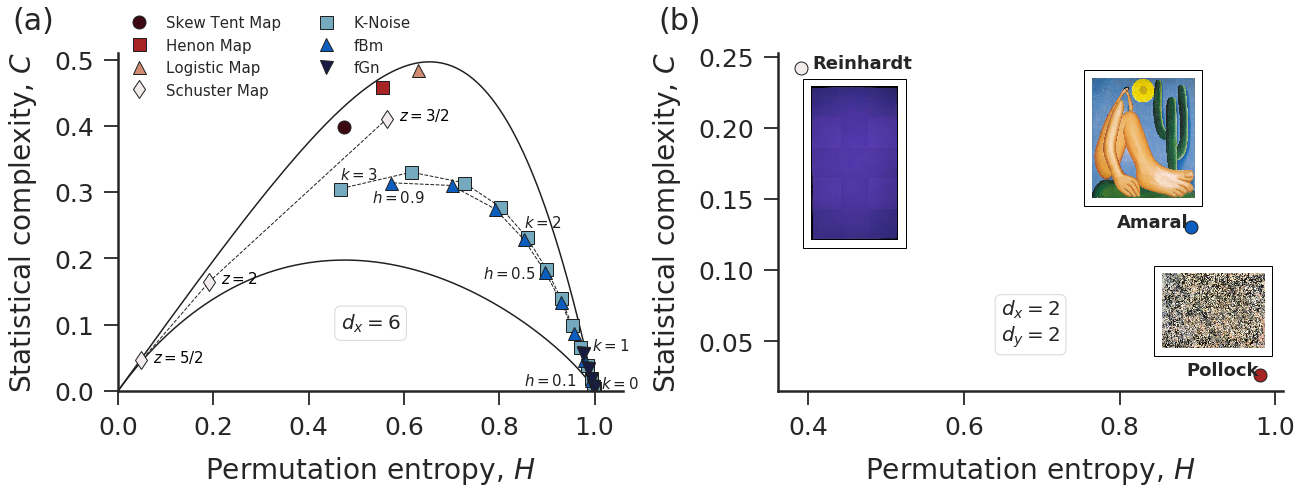

In [40]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=stdfigsize(nrows=1,ncols=2))

hc_data = [
    hc_stentmap, hc_henon_x, hc_logistic, hc_schuster, hc_knoise, hc_fbm,
    hc_fgn
]
labels = [
    'Skew Tent Map', 'Henon Map', 'Logistic Map', 'Schuster Map', 'K-Noise',
    'fBm', 'fGn'
]
markers = ['o', 's', '^', 'd', 's', '^', 'v']

#palettable.cmocean.diverging.Balance_7_r.hex_colors
colors = ['#3C0912', '#A72424', '#D08B73', '#F1ECEB', '#75AABE', '#0C5EBE', '#181C43'] 


for data_, marker_, color_, label_, cnt in zip(hc_data, markers, colors,
                                               labels, range(len(hc_data))):
    #point plotting
    h_, c_ = data_.T
    ax[0].plot(h_,
               c_,
               marker_,
               markersize=13,
               markeredgecolor='#202020',
               color=color_,
               label=label_)

    #dotted #202020 line connecting dots
    if cnt > 2:
        ax[0].plot(h_, c_, '--', linewidth=1, color='#202020', zorder=0)

        #annotations
        if cnt == 3:  #schuster map
            for tx_, x_, y_ in zip(['3/2', '2', '5/2'],
                                   h_ + np.asarray([.025] * 3),
                                   c_ + np.asarray([-.002] * 3)):
                ax[0].annotate('$z = {}$'.format(tx_),
                               xy=(x_, y_),
                               fontsize=15,
                               color='black')
        if cnt == 4:  #colored noise
            adjx_ = [0.015, 0.025, -.005, 0.0]
            adjy_ = [-0.00, -0.005, 0.015, .015]
            ncnt = 0
            for n_, x_, y_ in zip(
                    np.arange(0, 3.1, .25).round(decimals=2), h_, c_):
                if n_ in [0, 1, 2, 3]:
                    ax[0].annotate('$k = {}$'.format(int(n_)),
                                   xy=(x_ + adjx_[ncnt], y_ + adjy_[ncnt]),
                                   fontsize=15,
                                   color='#202020')
                    ncnt += 1
        if cnt == 5:  #fBm
            for tx_, x_, y_, adjx_, adjy_ in zip(['0.1', '0.5', '0.9'],
                                                 h_[[0, 4, 8]], c_[[0, 4, 8]],
                                                 [-.14, -.13, -.04],
                                                 [-0.008, -0.010, -0.03]):
                ax[0].annotate(r'$h = {}$'.format(tx_),
                               xy=(x_ + adjx_, y_ + adjy_),
                               fontsize=15,
                               color='#202020')

ax[0].legend(frameon=False, loc=(0, .85), ncol=2, fontsize=15)
ax[0].set_ylim(bottom=0, top=.51)
ax[0].set_xlim(left=0, right=1.06)

#theoretical curves
hmin, cmin = hc_min_curve  #(this variable is defined in the cell above)
hmax, cmax = hc_max_curve  #(this variable is defined in the cell above)
ax[0].plot(hmin, cmin, linewidth=1.5, color='#202020', zorder=0)
ax[0].plot(hmax, cmax, linewidth=1.5, color='#202020', zorder=0)

ax[0].set_ylabel('Statistical complexity, $C$')
ax[0].set_xlabel('Permutation entropy, $H$')
ax[0].annotate('$d_x = 6$', (.5, .2),
               va='center',
               ha='center',
               xycoords='axes fraction',
               fontsize=20,
               bbox={
                   'boxstyle': 'round',
                   'fc': 'white',
                   'alpha': 1,
                   'ec': '#d9d9d9'
               })

# palettable.cmocean.diverging.Balance_7_r.hex_colors[1::2]
painting_colors = ['#A72424', '#F1ECEB', '#0C5EBE'] 

for (h_,
     c_), cl_, (xoff, yoff), tx_, painting, (xcoord_, ycoord_), zoom_ in zip(
         hc_paintings, painting_colors, [(-.095, 0), (.015, 0), (-.095, 0)],
         ['Pollock', 'Reinhardt', 'Amaral'], [pollock, reinhardt, amaral],
         [(.92, .0713), (.46, .175), (.83, .193)], [.1, .2, .1]):
    ax[1].plot(h_, c_, 'o', markersize=13, markeredgecolor='#202020', color=cl_)
    ax[1].annotate(tx_, xy=(h_ + xoff, c_ + yoff), fontsize=18, weight='bold')

    box = mpl.offsetbox.OffsetImage(painting, zoom=zoom_)
    pic = mpl.offsetbox.AnnotationBbox(box, (xcoord_, ycoord_))
    ax[1].add_artist(pic)

ax[1].annotate('$d_x = 2$\n$d_y=2$', (.5, .2),
               va='center',
               ha='center',
               xycoords='axes fraction',
               fontsize=20,
               bbox={
                   'boxstyle': 'round',
                   'fc': 'white',
                   'alpha': 1,
                   'ec': '#d9d9d9'
               })

ax[1].set_xlabel('Permutation entropy, $H$')
ax[1].set_ylabel('Statistical complexity, $C$')

plt.draw()
for (i, ax_), x_ in zip(list(enumerate(ax)), [-.21, -.236]):
    ax_.annotate('(' + string.ascii_lowercase[i] + ')', (x_, 1.07),
                 xycoords='axes fraction',
                 fontsize=30,
                 )

f.tight_layout()
f.savefig('manuscript_figures/fig3.pdf', dpi=300, bbox_inches='tight')

## Using `missing_patterns` (Figure 4)

### definitions

In [72]:
def noisy_logistic(x0=.5, a=4, n=10000, amp=0.5):
    """
    Iterates the logistic map and 
    adds uniformly distributed 
    noise to the series.

    Parameters
    ----------
    x0 : initial population ([0,1] interval).
    a  : intrinsic growth rate. (a >= 0; interesting in [0,4] because
         it maps the orbit to the [0,1] interval to itself.)
    n  : number of iterations (length of the series).
    amp: uniform white noise generated in the interval [-amp, amp).
         os added to the logistic map time series.
    ----------
    Returns a logistic map orbit.
    """
    x    = np.zeros(n)
    x[0] = x0

    for i in range(n-1):
        x[i+1] = a*x[i]*(1-x[i])
            
    return x + np.random.uniform(-amp, amp, size=n)

### generating data

In [42]:
# runs in ~6 minutes. Already saved in the 'data' folder.

# fstates_logmap = []

# for dx_ in [5, 6]:
#     temp_amp = []
#     for amp_ in np.arange(0, .5, .001):
#         temp = []
#         for _ in range(10):
#             series = noisy_logistic(x0=np.random.uniform(), n=6000, amp=amp_)
#             temp.append(
#                 missing_patterns(series,
#                                  dx=dx_,
#                                  return_fraction=False,
#                                  return_states=False))
#         temp_amp.append(np.mean(temp))
#     fstates_logmap.append(temp_amp)

# np.save('data/fig4/fstates_logmap.npy', fstates_logmap)

fstates_logmap = np.load('data/fig4/fstates_logmap.npy')

In [43]:
# runs in ~1 minute. Already saved in the 'data' folder.

# fstates_pure_logmap = []
# fstates_rw = []

# for dx_ in [5, 6]:
#     temp_size = []
#     temp_size_rw = []
#     for n_ in np.arange(60, 6001, 90):
#         temp, temp_rw = [], []
#         for _ in range(10):
#             series = logistic_map(n=n_, x0=np.random.uniform())
#             temp.append(
#                 missing_patterns(series, dx=dx_, return_fraction=False)[1])
#             #
#             rws_ = np.cumsum(np.random.normal(size=n_))
#             temp_rw.append(
#                 missing_patterns(rws_, dx=dx_, return_fraction=False)[1])
#         #
#         temp_size.append(np.mean(temp))
#         temp_size_rw.append(np.mean(temp_rw))
#     fstates_pure_logmap.append(temp_size)
#     fstates_rw.append(temp_size_rw)

# np.save('data/fig4/fstates_pure_logmap.npy', fstates_pure_logmap)
# np.save('data/fig4/fstates_rw.npy', fstates_rw)

fstates_pure_logmap = np.load('data/fig4/fstates_pure_logmap.npy')
fstates_rw = np.load('data/fig4/fstates_rw.npy')

### plotting

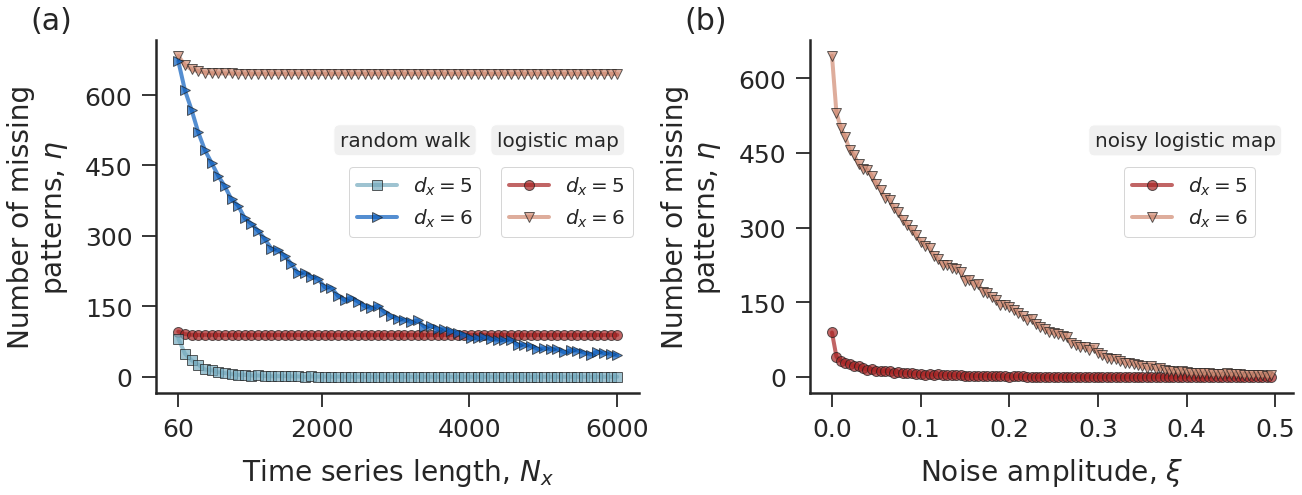

In [44]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=stdfigsize(nrows=1, ncols=2))

labels = ['$d_x = 5$', '$d_x = 6$']

#(a) logistic map whithout noise
logi_leg = []
for y_, l_, c_, m_ in zip(fstates_pure_logmap, labels, ['#A72424', '#D08B73'], ['-o','-v']):
    line, = ax[0].plot(np.arange(60, 6001, 90),
                       y_,
                       m_,
                       markersize=10,
                       markeredgecolor='#202020',
                       linewidth=4,
                       color=c_,
                       label=l_,
                       alpha=0.7)
    logi_leg.append(line)

rw_leg = []
for y_, l_, c_, m_ in zip(fstates_rw, labels, ['#75AABE', '#0C5EBE'], ['-s','->']):
    line, = ax[0].plot(np.arange(60, 6001, 90),
                       y_,
                       m_,
                       markersize=10,
                       markeredgecolor='#202020',
                       linewidth=4,
                       color=c_,
                       label=l_,
                       alpha=0.7)
    rw_leg.append(line)

ax[0].set_ylabel("Number of missing\npatterns, $\eta$")
ax[0].set_xlabel("Time series length, $N_x$")
ax[0].set_xticks([60, 2000, 4000, 6000])
ax[0].set_yticks(np.arange(0, 601, 150))

first_legend = plt.legend(handles=rw_leg, loc=(-0.955, .44))
plt.gca().add_artist(first_legend)
second_legend = plt.legend(handles=logi_leg, loc=(-0.64, .44))
plt.gca().add_artist(second_legend)

ax[0].annotate('logistic map', (.705, .7),
               xycoords='axes fraction',
               fontsize=20,
               bbox={
                   'boxstyle': 'round',
                   'fc': '#f0f0f0',
                   'alpha': 1
               })
ax[0].annotate('random walk', (.38, .7),
               xycoords='axes fraction',
               fontsize=20,
               bbox={
                   'boxstyle': 'round',
                   'fc': '#f0f0f0',
                   'alpha': 1
               })

#(b) logistic + noise
for y_, c_, l_, m_ in zip(fstates_logmap, ['#A72424', '#D08B73'], labels, ['-o','-v']):
    ax[1].plot(np.arange(0, .5, .001)[::5],
               y_[::5],
               m_,
               markersize=10,
               markeredgecolor='#202020',
               linewidth=4,
               color=c_,
               label=l_,
               alpha=0.7)


ax[1].set_yticks(np.arange(0, 601, 150))
ax[1].set_ylabel("Number of missing\npatterns, $\eta$")

ax[1].set_xticks(np.arange(0, .51, .1))
ax[1].set_xlabel(r"Noise amplitude, $\xi$")
ax[1].legend(loc=(.65, .44))
ax[1].annotate('noisy logistic map', (.777, .715),
               va='center',
               ha='center',
               xycoords='axes fraction',
               fontsize=20,
               bbox={
                   'boxstyle': 'round',
                   'fc': '#f0f0f0',
                   'alpha': 1
               })

for (i, ax_), xcoord_ in zip(list(enumerate(ax)), [-0.26, -0.26]):
    ax_.annotate('(' + string.ascii_lowercase[i] + ')', (xcoord_, 1.03),
                 xycoords='axes fraction',
                 fontsize=30)

f.tight_layout()
f.savefig('manuscript_figures/fig4.pdf', dpi=300, bbox_inches='tight')

## Using `tsallis_complexity_entropy` and `rényi_complexity_entropy` (Figure 5)

### generating data

In [45]:
# ~30 seconds to run.

logmap_dx3_probs = [1 / 3, 1 / 15, 4 / 15, 2 / 15, 1 / 5, 0]
rw_dx3_probs = [0.25, 0.125, 0.125, 0.125, 0.125, 0.25]
logistic_ts = logistic_map(n=1100000, x0=np.random.uniform())[100000:]
rw_ts = random_walk(1000000)

#Tsallis curves
h_theory_logmap_tsallis, c_theory_logmap_tsallis = tsallis_complexity_entropy(
    logmap_dx3_probs, q=np.logspace(-2, 2, num=1000), dx=3, probs=True).T
h_exp_logmap_tsallis, c_exp_logmap_tsallis = tsallis_complexity_entropy(
    logistic_ts, q=np.logspace(-2, 2, num=1000)).T

h_theory_rw_tsallis, c_theory_rw_tsallis = tsallis_complexity_entropy(
    rw_dx3_probs, q=np.logspace(-3, 2, num=1000), dx=3, probs=True).T
h_exp_rw_tsallis, c_exp_rw_tsallis = tsallis_complexity_entropy(rw_ts,
                                                                q=np.logspace(
                                                                    -3,
                                                                    2,
                                                                    num=1000),
                                                                dx=3).T

#Rényi curves
h_exp_logmap_renyi, c_exp_logmap_renyi = renyi_complexity_entropy(
    logistic_ts, alpha=np.logspace(-2, 2, num=1000), dx=4).T
h_exp_rw_renyi, c_exp_rw_renyi = renyi_complexity_entropy(rw_ts,
                                                          alpha=np.logspace(
                                                              -3, 2, num=1000),
                                                          dx=4).T

### plotting

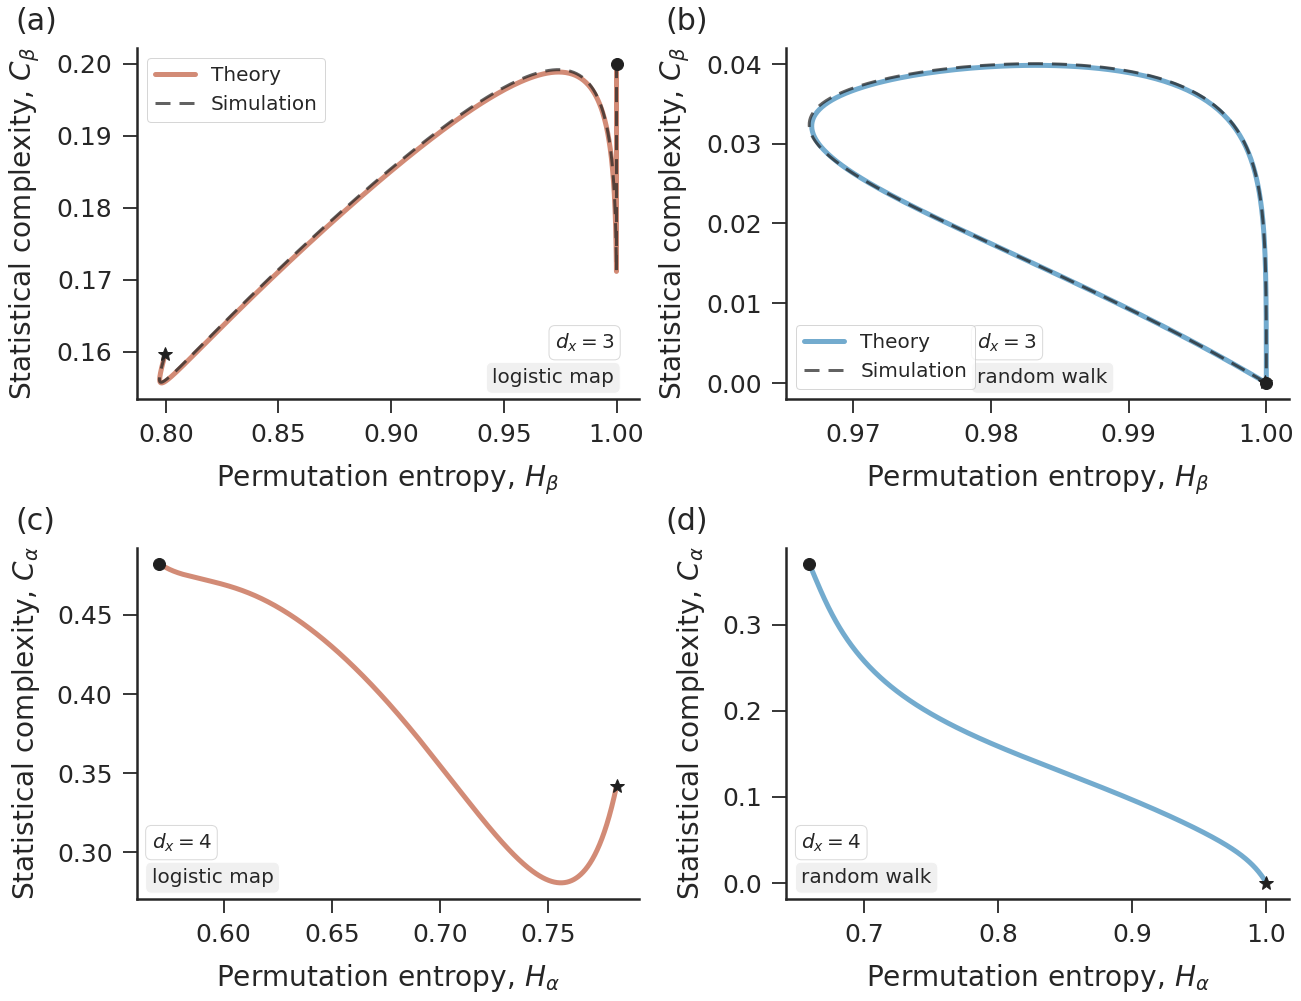

In [46]:
f, ax = plt.subplots(ncols=2, nrows=2, figsize=stdfigsize(ncols=2, nrows=2))

ax = ax.flatten()
colors = ['#C05A3C', '#3888BA']

ax[0].plot(h_exp_logmap_tsallis,
           c_exp_logmap_tsallis,
           '-',
           linewidth=5,
           color=colors[0],
           alpha=0.7,
           label='Theory')
ax[0].plot(h_theory_logmap_tsallis,
           c_theory_logmap_tsallis,
           dashes=(5, 3),
           linewidth=3,
           color='#202020',
           alpha=0.7,
           label='Simulation')
ax[0].plot(h_exp_logmap_tsallis[0],
           c_exp_logmap_tsallis[0],
           '*',
           color='#202020',
           markersize=15)
ax[0].plot(h_exp_logmap_tsallis[-1],
           c_exp_logmap_tsallis[-1],
           'o',
           color='#202020',
           markersize=12)


ax[0].set_xlabel(r'Permutation entropy, $H_\beta$')
ax[0].set_ylabel(r'Statistical complexity, $C_\beta$')
ax[0].annotate(r'logistic map', (0.95, 0.06),
               va='center',
               ha='right',
               xycoords='axes fraction',
               fontsize=20,
               bbox={
                   'boxstyle': 'round',
                   'fc': '#f0f0f0',
                   'alpha': 1
               })
ax[0].annotate('$d_x = 3$', (0.95, 0.16),
               va='center',
               ha='right',
               xycoords='axes fraction',
               fontsize=20,
               bbox={
                   'boxstyle': 'round',
                   'fc': 'white',
                   'ec': '#d9d9d9',
                   'alpha': 1
               })
ax[0].legend()

ax[1].plot(h_exp_rw_tsallis,
           c_exp_rw_tsallis,
           '-',
           linewidth=5,
           color=colors[1],
           alpha=0.7,
           label='Theory')
ax[1].plot(h_theory_rw_tsallis,
           c_theory_rw_tsallis,
           dashes=(5, 3),
           linewidth=3,
           color='#202020',
           alpha=0.7,
           label='Simulation')
ax[1].plot(h_exp_rw_tsallis[0],
           c_exp_rw_tsallis[0],
           '*',
           color='#202020',
           markersize=15)
ax[1].plot(h_exp_rw_tsallis[-1],
           c_exp_rw_tsallis[-1],
           'o',
           color='#202020',
           markersize=12)

ax[1].set_xlabel(r'Permutation entropy, $H_\beta$')
ax[1].set_ylabel(r'Statistical complexity, $C_\beta$')
ax[1].legend()
ax[1].annotate(r'random walk', (0.38, 0.06),
               va='center',
               ha='left',
               xycoords='axes fraction',
               fontsize=20,
               bbox={
                   'boxstyle': 'round',
                   'fc': '#f0f0f0',
                   'alpha': 1
               })
ax[1].annotate('$d_x = 3$', (0.38, 0.16),
               va='center',
               ha='left',
               xycoords='axes fraction',
               fontsize=20,
               bbox={
                   'boxstyle': 'round',
                   'fc': 'white',
                   'ec': '#d9d9d9',
                   'alpha': 1
               })

ax[2].plot(h_exp_logmap_renyi,
           c_exp_logmap_renyi,
           '-',
           linewidth=5,
           color=colors[0],
           alpha=0.7)
ax[2].plot(h_exp_logmap_renyi[0],
           c_exp_logmap_renyi[0],
           '*',
           color='#202020',
           markersize=15)
ax[2].plot(h_exp_logmap_renyi[-1],
           c_exp_logmap_renyi[-1],
           'o',
           color='#202020',
           markersize=12)
ax[2].set_xlabel(r'Permutation entropy, $H_\alpha$')
ax[2].set_ylabel(r'Statistical complexity, $C_\alpha$')
ax[2].annotate(r'logistic map', (0.03, 0.06),
               va='center',
               ha='left',
               xycoords='axes fraction',
               fontsize=20,
               bbox={
                   'boxstyle': 'round',
                   'fc': '#f0f0f0',
                   'alpha': 1
               })
ax[2].annotate('$d_x = 4$', (0.03, 0.16),
               va='center',
               ha='left',
               xycoords='axes fraction',
               fontsize=20,
               bbox={
                   'boxstyle': 'round',
                   'fc': 'white',
                   'ec': '#d9d9d9',
                   'alpha': 1
               })

ax[3].plot(h_exp_rw_renyi,
           c_exp_rw_renyi,
           '-',
           linewidth=5,
           color=colors[1],
           alpha=0.7)
ax[3].plot(h_exp_rw_renyi[0],
           c_exp_rw_renyi[0],
           '*',
           color='#202020',
           markersize=15)
ax[3].plot(h_exp_rw_renyi[-1],
           c_exp_rw_renyi[-1],
           'o',
           color='#202020',
           markersize=12)
ax[3].set_xlabel(r'Permutation entropy, $H_\alpha$')
ax[3].set_ylabel(r'Statistical complexity, $C_\alpha$')
ax[3].annotate(r'random walk', (0.03, 0.06),
               va='center',
               ha='left',
               xycoords='axes fraction',
               fontsize=20,
               bbox={
                   'boxstyle': 'round',
                   'fc': '#f0f0f0',
                   'alpha': 1
               })
ax[3].annotate('$d_x = 4$', (0.03, 0.16),
               va='center',
               ha='left',
               xycoords='axes fraction',
               fontsize=20,
               bbox={
                   'boxstyle': 'round',
                   'fc': 'white',
                   'ec': '#d9d9d9',
                   'alpha': 1
               })

for (i, ax_), x_ in zip(list(enumerate(ax)), [-.24, -.24, -.24, -.24]):
    ax_.annotate('(' + string.ascii_lowercase[i] + ')', (x_, 1.05),
                 xycoords='axes fraction',
                 fontsize=30)

f.tight_layout()

f.savefig('manuscript_figures/fig5.pdf',
          dpi=300,
          bbox_inches='tight')

## Using `ordinal_network` (Figure 6)

### defitions

In [73]:
#Rössler system
def rossler_equations_with_params(t, y, alpha, beta, gamma):
    """
    Right hand side of Rössler's equations
    which are defined as

    x' = - y - z
    y' = x + ay
    z' = b + z(x - c).
    
    with the prime denoting the derivative of the variable.

    Parameters
    ----------
    t : time.
    y : state vector of variables x, y and z.
    ----------

    Returns the right hand side of Rössler's system 
    as a list.
    """
#equations' variables
    x1, x2, x3 = y

#creating f = (x', y', z'): right hand side of Rössler's oscillator.
    return [-x2-x3, x1+alpha*x2, beta + x3*(x1-gamma)]

In [74]:
def ornament_function(angle=135, omega=9, size=2040, probability=0):
    """
    Periodic ornament defined in "Discriminating image textures 
    with multiscale two-dimensional complexity-entropy
    causality plane" by Zunino and Ribeiro (Chaos, Solitons and Fractals, 
    2016).
    
    Parameters
    ----------
    angle      : inclination of the ornament's stripes.
    omega      : frequency (number of black stripes > 0).
    size       : lattice size (size x size).
    probability: probability of permuting pixels in the 
                 original ornament (e.g. 0.05, 0.25, 0.5).
    ----------
    Returns a bidimensional np.array (matrix).
    """
    if probability==0:
        angle  = np.math.pi*angle/180 - np.math.pi/2
        omega  = omega/np.math.pi*2

        x      = np.linspace(0, 2*np.math.pi, size)
        y      = np.linspace(0, 2*np.math.pi, size)
        xx, yy = np.meshgrid(x, y)

        z      = np.sin(omega*xx*np.cos(angle) - omega*yy*np.sin(angle))

        return z
#
    else:
        angle  = np.math.pi*angle/180 - np.math.pi/2
        omega  = omega/np.math.pi*2

        x      = np.linspace(0, 2*np.math.pi, size)
        y      = np.linspace(0, 2*np.math.pi, size)
        xx, yy = np.meshgrid(x, y)
        
        z      = np.sin(omega*xx*np.cos(angle) - omega*yy*np.sin(angle))
        nx, ny = z.shape
        z      = z.flatten()

        random         = np.random.randint(0,99, size=size*size)
        args_to_change = np.argwhere(random<int(probability*100)).flatten()
        np.random.shuffle(args_to_change)

        for i,j in zip(args_to_change[:-1:2], args_to_change[1::2]):
            temp = z[j]
            z[j] = z[i]
            z[i] = temp

        z = z.reshape(nx, ny)
        
        return z

### generaling data

In [49]:
# ~20 seconds run. Solving the Rössler system. Results already saved in the 'data' folder.

# import scipy.integrate
# rossler_curve = scipy.integrate.solve_ivp(rossler_equations_with_params, 
#                                           t_span = (0, 20000), 
#                                           y0=[np.random.uniform() for _ in range(3)], 
#                                           dense_output=True,
#                                           args=(.3, 2, 4),
#                                           atol=1.0e-8, 
#                                           rtol=1.0e-6)
# #x-coordinate time series
# ts_xrossler03          = rossler_curve.y[0]
# #.2 time sampling
# ts_xrossler03 = rossler_curve.sol(np.arange(0,20000,.2))[0]
# np.save('data/fig6/xrossler0.3.npy', ts_xrossler03)

ts_xrossler03 = np.load('data/fig6/xrossler0.3.npy')

In [50]:
# This time series was generated using the C code available in:
# http://www.columbia.edu/~ad3217/fbm/hosking.c
# fbm_ordnet8 = fbm(16,0.8,seed=15)
# np.save('data/fig6/fbm_series_to_ordnets0.8.npy', fbm_ordnet8)
fbm_ordnet8 = np.load('data/fig6/fbm_series_to_ordnets0.8.npy')

### plotting

/home/arthur/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


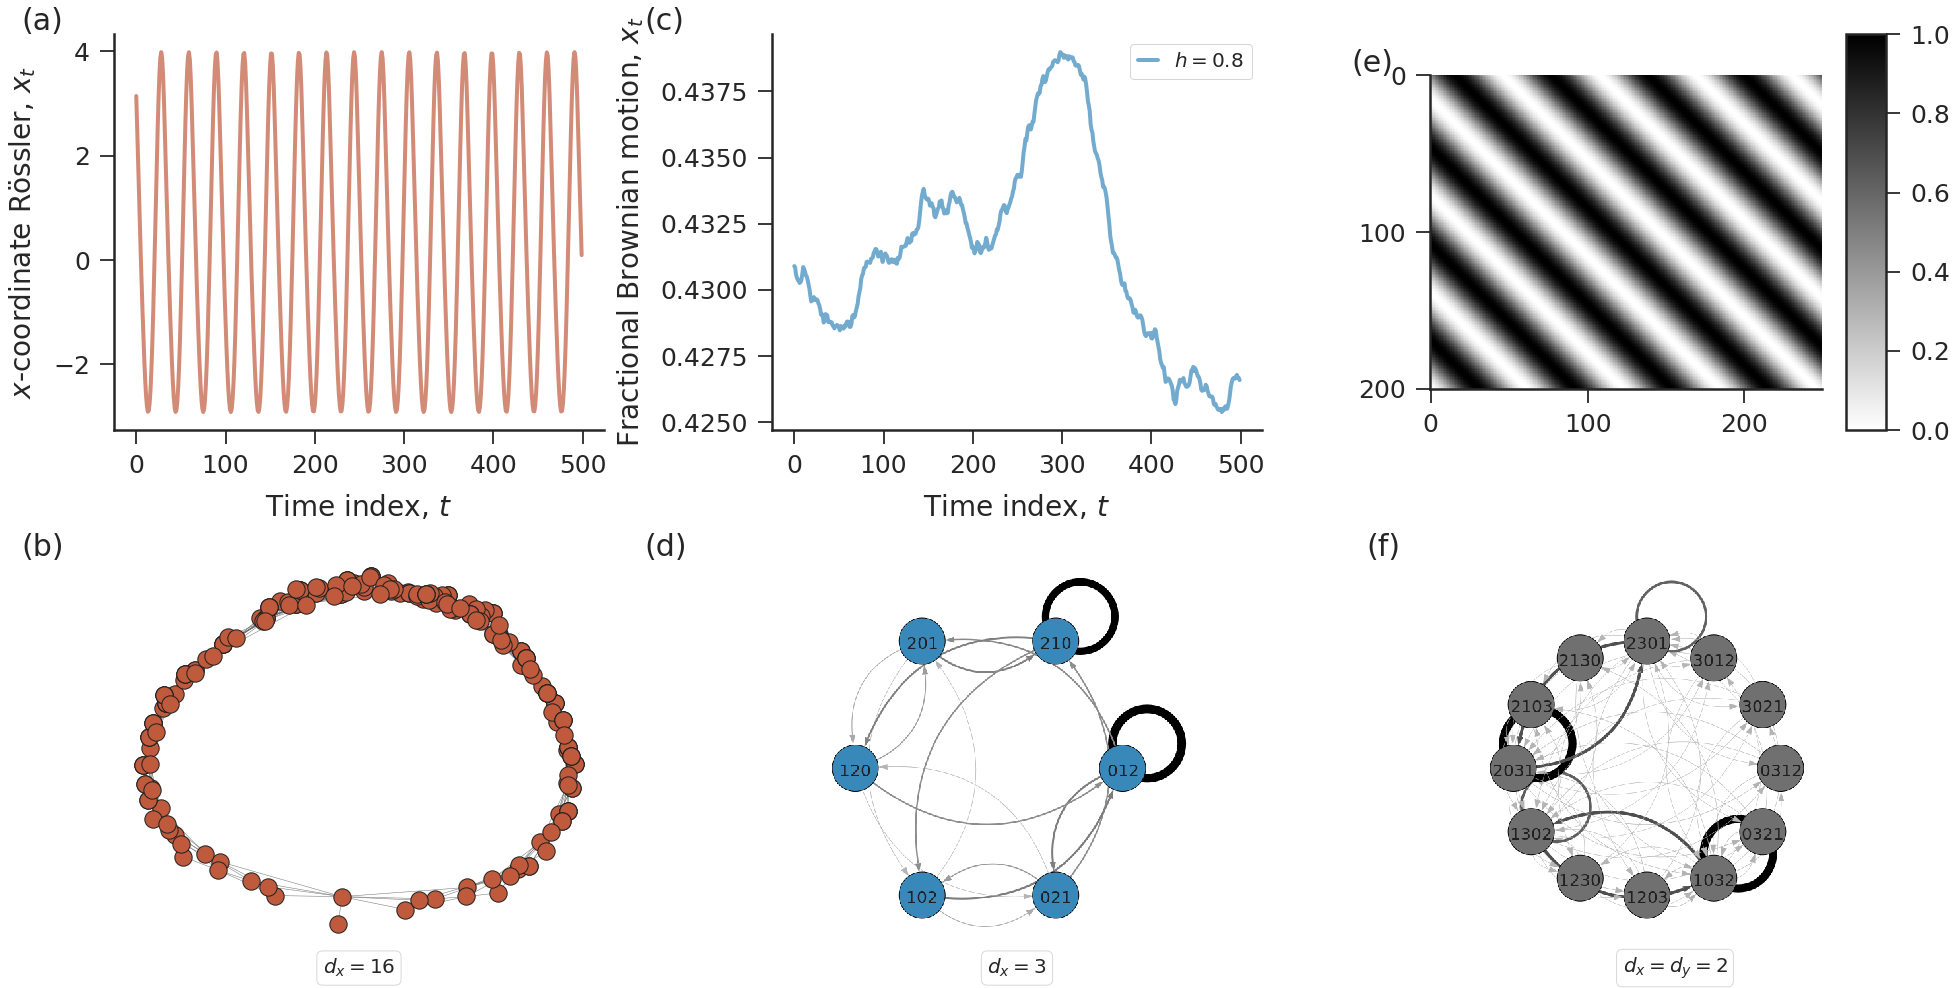

In [51]:
f, ax = plt.subplots(ncols=3, nrows=2, figsize=stdfigsize(ncols=3, nrows=2))
ax = ax.flatten()

colors = ['#C05A3C', '#3888BA']

#Rössler series plotting
ax[0].plot(range(500),
           ts_xrossler03[-500:],
           color=colors[0],
           linewidth=4,
           alpha=0.7)
ax[0].set_ylabel('$x$-coordinate Rössler, $x_t$')
ax[0].set_xlabel('Time index, $t$')
ax[0].annotate('(a)', (-.19, 1.01), xycoords='axes fraction', fontsize=30)

#fBm series plotting
ax[1].plot(range(500),
           fbm_ordnet8[-500:],
           color=colors[1],
           linewidth=4,
           label='$h = 0.8$',
           alpha=0.7)
ax[1].set_ylabel('Fractional Brownian motion, $x_t$')
ax[1].set_xlabel('Time index, $t$')
ax[1].legend(handlelength=1)
ax[1].annotate('(c)', (-.26, 1.01), xycoords='axes fraction', fontsize=30)

#ornament plotting
array2d = normalize_array(ornament_function(size=250, probability=0))
ax[2].imshow(array2d, cmap='gist_gray_r', rasterized=True)

pos = ax[2].imshow(array2d, cmap='gist_gray_r')
f.colorbar(pos, ax=ax[2], aspect=10)
ax[2].set_yticks(np.arange(0, 251, 100))
ax[2].set_xticks(np.arange(0, 251, 100))
# ax[2].invert_yaxis()
ax[2].annotate('(e)', (-.20, 1.01), xycoords='axes fraction', fontsize=30)

#Rossler graph
nodes, edges, _ = ordinal_network(ts_xrossler03,
                                  dx=16,
                                  overlapping=False,
                                  directed=False)
g_ross = nx.Graph()
g_ross.add_nodes_from(nodes)
g_ross.add_edges_from(edges)

ax[3].axis('off')
nx.draw(g_ross,
        pos=nx.drawing.layout.spectral_layout(g_ross),
        ax=ax[3],
        node_color=colors[0],
        edgecolors='#202020',
        edge_color='#737373',
        width=0.5)
ax[3].annotate('(b)', (-.19, 0.99), xycoords='axes fraction', fontsize=30)
ax[3].annotate('$d_x = 16$', (0.5, -0.05),
               va='center',
               ha='center',
               xycoords='axes fraction',
               fontsize=20,
               bbox={
                   'boxstyle': 'round',
                   'fc': 'white',
                   'ec': '#d9d9d9',
                   'alpha': 1
               })

#fBm graph
nodes, edges, weights = ordinal_network(fbm_ordnet8)
g = igraph.Graph(directed=True)
g.add_vertices(nodes)
g.add_edges(edges)
g.vs["label"] = nodes
g.es["weight"] = weights

igraph.plot(
    g,
    'data/fig6/fbm_graph0.8.png',
    layout='circle',
    box=(400, 400),
    vertex_label=[s.replace('|', '') for s in g.vs['label']],
    vertex_label_size=25,
    vertex_label_color='#202020',
    margin=[55, 135, 140, 80],
    vertex_size=70,
    vertex_color=colors[1],
    edge_curved=True,
    edge_color=list(
        map(
            mpl.colors.to_hex,
            list(
                map(mpl.cm.get_cmap(name='Greys'),
                    0.4 + normalize_array(np.asarray(g.es['weight'])))))),
    edge_width=(0.3 + 50 * np.asarray(g.es['weight'])).tolist(),
)

img_ = mpimg.imread('data/fig6/fbm_graph0.8.png')
ax[4].axis('off')
ax[4].imshow(img_)
ax[4].annotate('(d)', (-0.44, 0.99), xycoords='axes fraction', fontsize=30)
ax[4].annotate('$d_x = 3$', (0.5, -0.05),
               va='center',
               ha='center',
               xycoords='axes fraction',
               fontsize=20,
               bbox={
                   'boxstyle': 'round',
                   'fc': 'white',
                   'ec': '#d9d9d9',
                   'alpha': 1
               })

#ornament graph
nodes, edges, weights = ordinal_network(ornament_function(probability=0,
                                                          size=250),
                                        dx=2,
                                        dy=2)
g = igraph.Graph(directed=True)
g.add_vertices(nodes)
g.add_edges(edges)
g.vs["label"] = nodes
g.es["weight"] = weights

igraph.plot(
    g,
    'data/fig6/graph-ornament-0.0.png',
    layout='circle',
    box=(1400, 1400),
    vertex_label=[s.replace('|', '') for s in g.vs['label']],
    vertex_label_size=25,
    vertex_label_color='#202020',
    margin=[55, 135, 140, 80],
    vertex_size=70,
    vertex_color='#707070',
    edge_curved=True,
    edge_color=list(
        map(
            mpl.colors.to_hex,
            list(
                map(mpl.cm.get_cmap(name='Greys'),
                    0.4 + normalize_array(np.asarray(g.es['weight'])))))),
    edge_width=(0.6 + 50 * np.asarray(g.es['weight'])).tolist(),
)

img_ = mpimg.imread('data/fig6/graph-ornament-0.0.png')
ax[5].axis('off')
ax[5].imshow(img_)
ax[5].annotate('(f)', (-.28, 0.99), xycoords='axes fraction', fontsize=30)
ax[5].annotate('$d_x = d_y = 2$', (0.5, -0.05),
               va='center',
               ha='center',
               xycoords='axes fraction',
               fontsize=20,
               bbox={
                   'boxstyle': 'round',
                   'fc': 'white',
                   'ec': '#d9d9d9',
                   'alpha': 1
               })

f.tight_layout()
f.savefig('manuscript_figures/fig6.pdf', dpi=300, bbox_inches='tight')

## Using `global_node_entropy` (Figure 7)

### definitions

In [75]:
def noisy_sawtooth(dx, length=10000, snr=0):
    """
    Generates a periodic ([0,1] interval)
    time series in the form of a sawtooth 
    function.
    
    Parameters
    ----------
    dx: embedding dimension.
    length: number of data points in the 
            generated time series. Ideally, 
            a multiple of dx.
    snr: signal to noise ratio.
    ----------
    Returns a numpy array.
    """
    series = np.arange(dx)/(dx-1)
    series = np.tile(series, length//dx)
    if snr != 0:
        return series + np.random.uniform(-snr, snr, size=len(series))
    else:
        return series

### generating data

In [53]:
# ~3 minutes to run. Already saved in the 'data' folder.

# ordnet_noisy_series    = []
# ordnetstd_noisy_series = []

# for dx_ in [2,3,4,5]:
#     pe, gne = [], []
#     gnestd, pestd = [], []
#     normalization = global_node_entropy(random_ordinal_network(dx=dx_))
#     for snr_ in np.arange(0,2.02,0.05).round(decimals=2):
#         gne_, pe_ = [], []
#         for _ in range(10):
#             series = noisy_sawtooth(dx=dx_, length=10000, snr=snr_)
#             pe_.append(permutation_entropy(series, dx=dx_, base=2))
#             gne_.append(global_node_entropy(series, dx=dx_)/normalization)

#         gne.append(np.mean(gne_))
#         pe.append(np.mean(pe_))
        
#         gnestd.append(np.std(gne_))
#         pestd.append(np.std(pe_))
        
#     ordnet_noisy_series.append([pe, gne])
#     ordnetstd_noisy_series.append([pestd, gnestd])

# np.save('data/ordnet_noisy_series.npy', ordnet_noisy_series)
# np.save('data/ordnetstd_noisy_series.npy', ordnetstd_noisy_series)

ordnet_noisy_series = np.load('data/fig7/ordnet_noisy_series.npy')
ordnetstd_noisy_series = np.load('data/fig7/ordnetstd_noisy_series.npy')

In [54]:
# gne22hor_brodatz = []
# gne22ver_brodatz = []

# Notice that all images are not in the 'data' folder. However, they can be easily download from https://multibandtexture.recherche.usherbrooke.ca/normalized_brodatz.html
# for path in sorted(glob.glob('data/fig7/brodatz/*.tif')):    
#     image  = mpimg.imread(path)

#     gne22hor_brodatz.append(global_node_entropy(image, dx=2, dy=2, connections='horizontal'))
#     gne22ver_brodatz.append(global_node_entropy(image, dx=2, dy=2, connections='vertical'))

# np.save('data/fig7/gne22hor_brodatz.npy', gne22hor_brodatz)
# np.save('data/fig7/gne22ver_brodatz.npy', gne22ver_brodatz)

brodatz_gne22h_normalized = np.load('data/fig7/gne22hor_brodatz.npy')
brodatz_gne22v_normalized = np.load('data/fig7/gne22ver_brodatz.npy')

### plotting

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


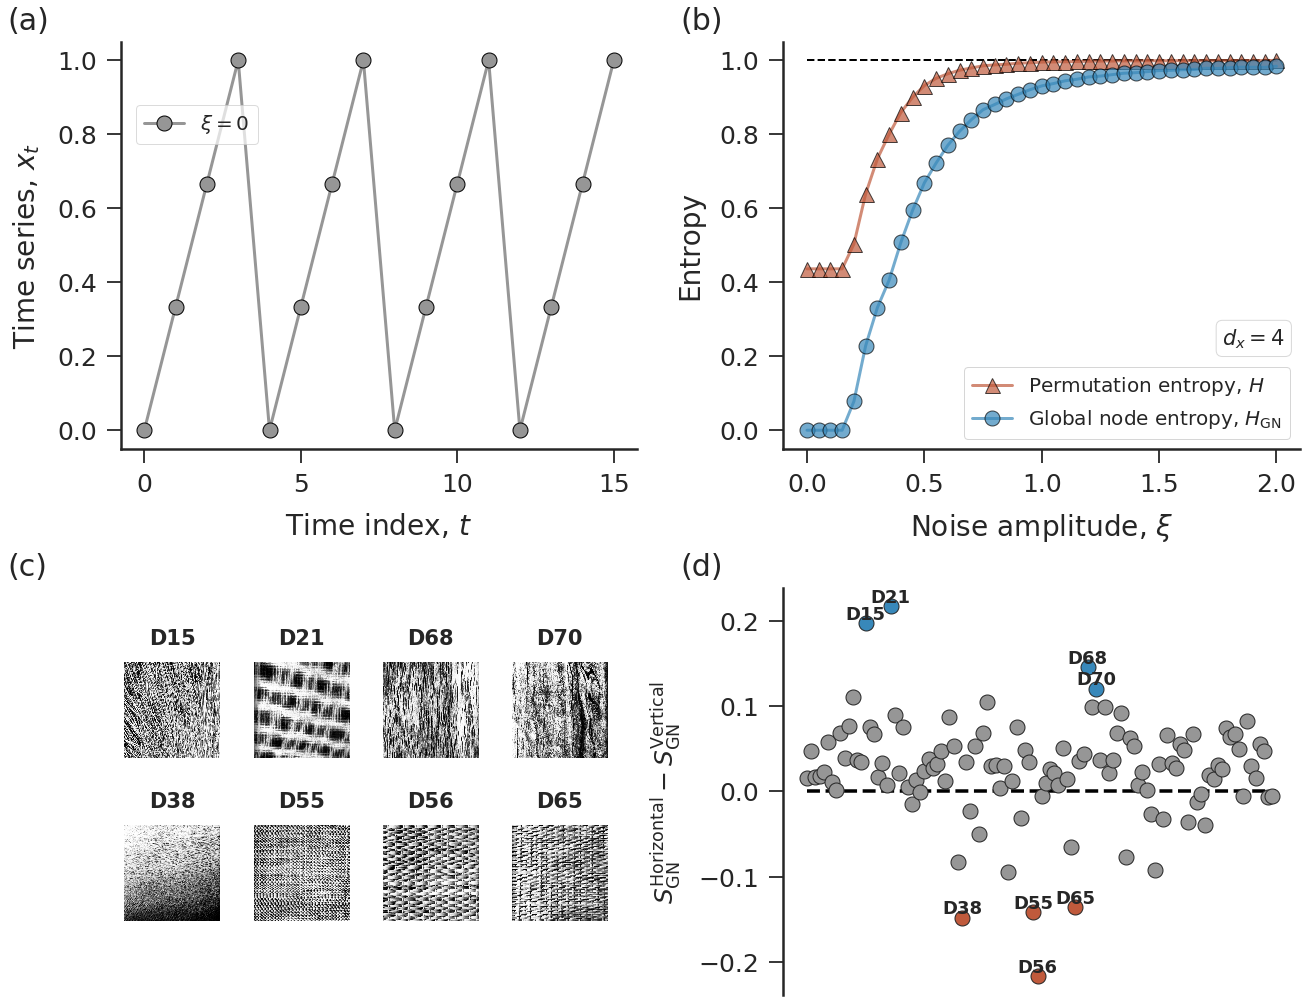

In [55]:
f, ax = plt.subplots(nrows=2, ncols=2, figsize=stdfigsize(nrows=2, ncols=2))
ax = ax.flatten()

colors = ['#C05A3C', '#3888BA']

#saw tooth series
ax[0].plot(noisy_sawtooth(dx=4, length=16),
           '-o',
           markersize=15,
           color='#969696',
           markeredgecolor='black',
           label=r'$\xi = 0$',
           zorder=1)
ax[0].set_xlabel('Time index, $t$')
ax[0].set_ylabel('Time series, $x_t$')
ax[0].legend(framealpha=.7, loc=(.03, .75))

ax[2].axis('off')
files = [
    'data/fig7/brodatz/D15.tif', 'data/fig7/brodatz/D21.tif',
    'data/fig7/brodatz/D68.tif', 'data/fig7/brodatz/D70.tif',
    'data/fig7/brodatz/D38.tif', 'data/fig7/brodatz/D55.tif',
    'data/fig7/brodatz/D56.tif', 'data/fig7/brodatz/D65.tif'
]

for i_, s_ in enumerate(files[:4]):
    img_ = mpimg.imread(s_)
    box = mpl.offsetbox.OffsetImage(img_,
                                    zoom=0.15,
                                    cmap='Greys',
                                    interpolation='nearest',
                                    rasterized=True)
    pic = mpl.offsetbox.AnnotationBbox(box, (0.1 + 0.25 * i_, 0.7),
                                       frameon=False)
    ax[2].add_artist(pic)
    ax[2].annotate(s_.split('/')[-1][:-4], (0.1 + 0.25 * i_, 0.9),
                   weight='bold',
                   fontsize=21,
                   ha='center',
                   va='top')

for i_, s_ in enumerate(files[-4:]):
    img_ = mpimg.imread(s_)
    box = mpl.offsetbox.OffsetImage(img_,
                                    zoom=0.15,
                                    cmap='Greys',
                                    interpolation='nearest',
                                    rasterized=True)
    pic = mpl.offsetbox.AnnotationBbox(box, (0.1 + 0.25 * i_, 0.3),
                                       frameon=False)
    ax[2].annotate(s_.split('/')[-1][:-4], (0.1 + 0.25 * i_, 0.5),
                   weight='bold',
                   fontsize=21,
                   ha='center',
                   va='top')
    ax[2].add_artist(pic)

#permutation entropy and global node entropy
x_ = np.arange(0, 2.02, 0.05).round(decimals=2)

for entropy_, m_, c_, l_, i in zip(
        ordnet_noisy_series[2], ['-^', '-o'], colors,
    [r'Permutation entropy, $H$', r'Global node entropy, $H_{\rm GN}$'],
        range(2)):
    if i == 1:
        ax[1].plot(x_,
                   entropy_,
                   m_,
                   markersize=15,
                   color=c_,
                   markeredgecolor='black',
                   label=l_,
                   alpha=0.7)
    else:
        ax[1].plot(x_,
                   entropy_,
                   m_,
                   markersize=15,
                   color=c_,
                   markeredgecolor='black',
                   label=l_,
                   alpha=0.7)
ax[1].hlines(1, 0, 2, linestyle='--', linewidth=2)
ax[1].set_xlabel(r'Noise amplitude, $\xi$')
ax[1].set_ylabel(r'Entropy')
ax[1].annotate('$d_x = 4$', (.85, .3),
               xycoords='axes fraction',
               ha='left',
               va='top',
               fontsize=21,
               bbox={
                   'boxstyle': 'round',
                   'fc': 'white',
                   'ec': '#d9d9d9',
                   'alpha': 1
               })
ax[1].legend()

#brodatz analysis
brodatz_names = [
    s_.split('/')[-1][:-4] for s_ in sorted(glob.glob('data/fig7/brodatz/*.tif'))
]

ax[3].set_ylabel(r'$S_{\rm GN}^{\rm Horizontal}-S_{\rm GN}^{\rm Vertical}$',
                 fontsize=25)
ax[3].spines['bottom'].set_visible(False)
ax[3].tick_params(bottom=False, labelbottom=False)
ax[3].plot([0, 112], [0, 0], '--', color='black', linewidth=3.5, zorder=0)

cnt = 0
for x_, y_ in zip(range(len(brodatz_gne22h_normalized)),
                  brodatz_gne22h_normalized - brodatz_gne22v_normalized):
    if y_ > .12:
        ax[3].annotate(brodatz_names[cnt], (x_, y_),
                       weight='bold',
                       fontsize=18,
                       ha='center',
                       va='bottom')
        ax[3].plot(x_,
                   y_,
                   'o',
                   markeredgecolor='#252525',
                   markersize=15,
                   color=colors[1])
        cnt += 1
    elif y_ < -.13:
        ax[3].annotate(brodatz_names[cnt], (x_, y_),
                       fontsize=18,
                       weight='bold',
                       ha='center',
                       va='bottom')
        ax[3].plot(x_,
                   y_,
                   'o',
                   markeredgecolor='#252525',
                   markersize=15,
                   color=colors[0])
        cnt += 1
    else:
        ax[3].plot(x_,
                   y_,
                   'o',
                   markeredgecolor='#252525',
                   markersize=15,
                   color='#969696')

for (i, ax_), (x_, y_) in zip(list(enumerate(ax.flatten())), [(-.22, 1.03),
                                                              (-.2, 1.03),
                                                              (-.22, 1.03),
                                                              (-.2, 1.03)]):
    ax_.annotate('(' + string.ascii_lowercase[i] + ')', (x_, y_),
                 xycoords='axes fraction',
                 fontsize=30)

f.tight_layout()
f.savefig('manuscript_figures/fig7.pdf', dpi=72, bbox_inches='tight'
          )  #https://github.com/matplotlib/matplotlib/issues/10844

## Using `missing_links` (Figure 8)

### generating data

In [56]:
# ~15 minutes to run. Already daved in the 'data' folder.

# flinks_noise = []

# for dx_ in [3,4,5,6]:
#     temp_size = []
#     for size_ in np.unique(np.logspace(1,5,200).astype(int)):
#         temp  = []
#         for _ in range(10):
#             series = np.random.normal(size=size_)
#             temp.append(missing_links(series, dx=dx_, return_links=False))
#         temp_size.append(np.mean(temp))
#     flinks_noise.append(temp_size)
    
# np.save('data/fig8/flinks_noise.npy', flinks_noise)

flinks_noise = np.load('data/fig8/flinks_noise.npy')

In [57]:
# ~10 minutes to run. Already daved in the 'data' folder

# flinks_logmap = []

# for dx_ in [3,4,5,6]:
#     temp_size = []
#     for size_ in np.unique(np.logspace(1,5,200).astype(int)):
#         temp  = []
#         for _ in range(10):
#             series = logistic_map(n=size_)
#             temp.append(missing_links(series, dx=dx_, return_links=False))
#         temp_size.append(np.mean(temp))
#     flinks_logmap.append(temp_size)
    
# np.save('data/fig8/flinks_logmap.npy', flinks_logmap)

flinks_logmap = np.load('data/fig8/flinks_logmap.npy')

### plotting

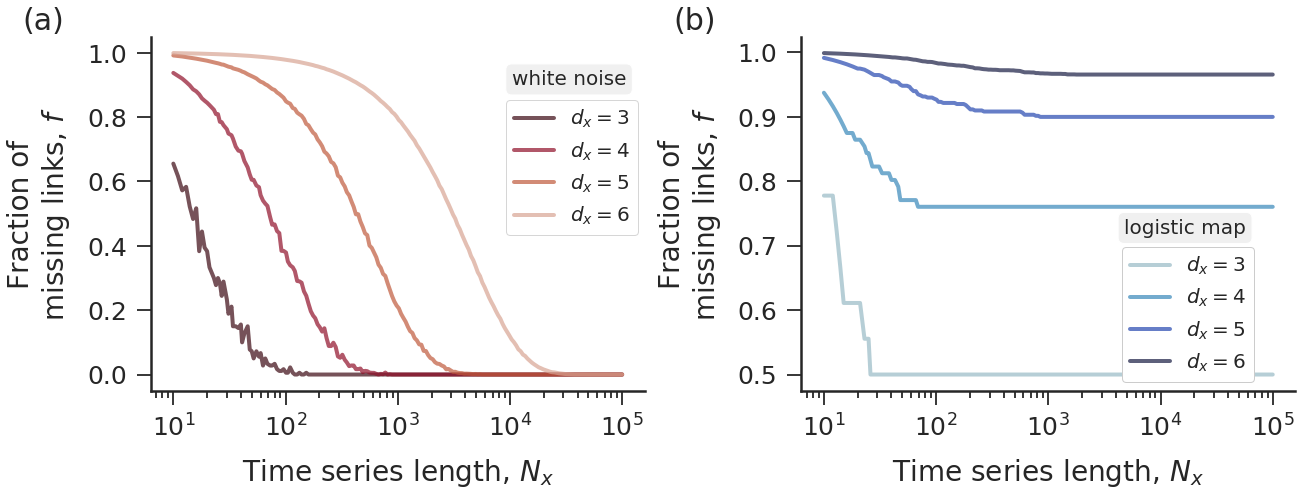

In [58]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=stdfigsize(ncols=2, nrows=1))

labels = ['$d_x = 3$', '$d_x = 4$', '$d_x = 5$', '$d_x = 6$']
#palettable.cmocean.diverging.Balance_9_r.hex_colors[:4]
reds = ['#3C0912', '#901029', '#C05A3C', '#D8A493']
#palettable.cmocean.diverging.Balance_9_r.hex_colors[-4:]
blues = ['#98BAC5', '#3888BA', '#2548B0', '#181C43']

#missing links white noise
ax[0].set_xscale('log')
for y_, l_, c_ in zip(flinks_noise, labels, reds):
    ax[0].plot(np.unique(np.logspace(1, 5, 200).astype(int)),
               y_,
               '-',
               linewidth=4,
               color=c_,
               label=l_,
               alpha=0.7)

ax[0].set_ylabel("Fraction of\nmissing links, $f$")
ax[0].set_xlabel("Time series length, $N_x$")
ax[0].legend(loc=(.72, .44))
ax[0].annotate('white noise', (.847, .88),
               va='center',
               ha='center',
               xycoords='axes fraction',
               fontsize=20,
               bbox={
                   'boxstyle': 'round',
                   'fc': '#f0f0f0',
                   'alpha': 1
               })

#missing links logistic map
ax[1].set_xscale('log')
for y_, l_, c_ in zip(flinks_logmap, labels, blues):
    ax[1].plot(np.unique(np.logspace(1, 5, 200).astype(int)),
               y_,
               '-',
               linewidth=4,
               color=c_,
               label=l_,
               alpha=0.7)

ax[1].set_ylabel("Fraction of\nmissing links, $f$")
ax[1].set_xlabel("Time series length, $N_x$")
ax[1].legend(loc=(.65, .025), framealpha=1)
ax[1].annotate('logistic map', (.777, .46),
               va='center',
               ha='center',
               xycoords='axes fraction',
               fontsize=20,
               bbox={
                   'boxstyle': 'round',
                   'fc': '#f0f0f0',
                   'alpha': 1
               })

for (i, ax_), (x_, y_) in zip(list(enumerate(ax.flatten())),
                              [(-.26, 1.02)] * 2):
    ax_.annotate('(' + string.ascii_lowercase[i] + ')', (x_, y_),
                 xycoords='axes fraction',
                 fontsize=30)

f.tight_layout()
f.savefig('manuscript_figures/fig8.pdf', dpi=300, bbox_inches='tight')